In [1]:
%load_ext autoreload
%autoreload 2

# Add the project directory to our module path
import os
import sys

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
# Import the rest of our modules
import pandas as pd
pd.set_option('display.max_columns', 500)
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

# Import py files
from src import cm_class_LRM as LRM # Logistic Regression Model Class
from src import cm_class_KNN as KNN # K-Nearest Neighbor Model Class

# Create paths to folders in repo
data_folder = '../../data/'
figure_folder = '../../src/'

# Import Data

In [3]:
df=pd.read_csv('../../data/bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


- State and area code: location
- phone number: drop
- non-numeric data: state, phone number, international plan, voice mail plan

In [4]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### CHECK FOR MISSING DATA

In [5]:
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

### CHECK FOR IMBALANCE
Data looks to be imbalanced, need to consider balancing techniques
- SMOTE?

In [6]:
df.churn.value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [7]:
df.churn.value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

### COLUMN  DATA TYPES
- All numeric other than: state, phone number, international plan and voice mail plan

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### ASSIGN OUTCOME CLASSES

In [9]:
# USING SKLEARN LabelEncoder
le = LabelEncoder()

# Assigns binary classes to 'churn' 
# le.fit_transform(df['churn'])
df['target'] = le.fit_transform(df['churn'])

# Class 0 is index 0 in this array: False 
# Class 1 is index 1 in this array: True
print(le.classes_)

df.head()

[False  True]


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,target
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,0


### SET X AND y

In [10]:
X = df[['account length','total night calls','number vmail messages','total day minutes','total day charge','total eve minutes']]
y = df.target 

In [11]:
type(X)

pandas.core.frame.DataFrame

# Logistic Regression Modeling

### A. Initial LogReg model

In [12]:
m1_LogReg = LRM.LogRegModel(X, y, random_state=42)

TRAINING DATA RESULTS 

Confusion Matrix
[[2141    0]
 [ 355    3]] 
 ----------------------
Cross Validation Score
0.8579437751004015 
 ----------------------
Precision Recall Score
0.4758900893040541 
 ----------------------
LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
AUC for 0.001: 0.6287147184915941
-------------------------------------------------------
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
AUC for 0.01: 0.6316632701786613

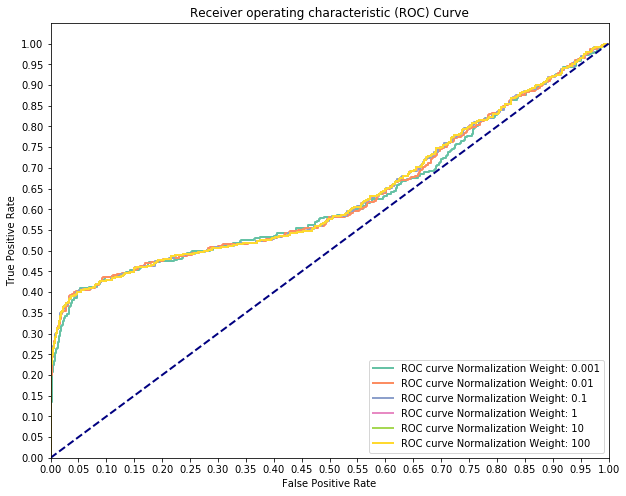

In [13]:
results, coef_, intercept_, m1_LRM_params = m1_LogReg.LRM_model()

In [14]:
m1_LRM_params

<bound method BaseEstimator.get_params of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)>

# K-Nearest Neighbors

### 1A. Initial KNN model

- MinMaxScaler
- Kfold cross validation

In [15]:
m1_knn = KNN.knnModel(X, y, random_state=42)

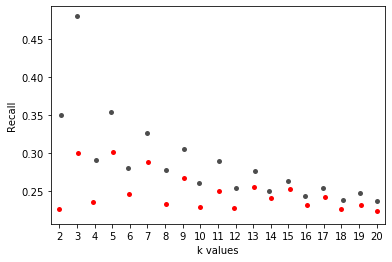

In [16]:
k_scores_train, k_scores_val = m1_knn.KNN_train()

In [17]:
k_scores_train

{2: 0.3497645165830031,
 3: 0.4800707581299748,
 4: 0.2913409068318894,
 5: 0.3534335829437523,
 6: 0.28018617176880994,
 7: 0.32647370970130773,
 8: 0.278012337044791,
 9: 0.30499747669916044,
 10: 0.259972499835246,
 11: 0.28945396417309105,
 12: 0.25402828590152393,
 13: 0.27578168173678297,
 14: 0.24940135967745952,
 15: 0.26277540446982534,
 16: 0.24261231578126358,
 17: 0.25382853473252276,
 18: 0.2373416930065347,
 19: 0.24668436850577943,
 20: 0.23609897970736302}

In [18]:
k_scores_val

{2: 0.22596311858076562,
 3: 0.30013144045496987,
 4: 0.23517269331975213,
 5: 0.30191426873779814,
 6: 0.24593638061285122,
 7: 0.2882162380103557,
 8: 0.23324845089550972,
 9: 0.26659867583396996,
 10: 0.22821237585943469,
 11: 0.24931011798658856,
 12: 0.22777119938884643,
 13: 0.2553558696205755,
 14: 0.2408133859604448,
 15: 0.25250381970970204,
 16: 0.2311344537815126,
 17: 0.24229458450046684,
 18: 0.22636172650878533,
 19: 0.23101540616246502,
 20: 0.22286032594856126}

#### k = 13 appears to have the best results
##### 13: 0.890, 0.889

### 1B. Hyperparameter Tuning (GridSearchCV)

* 5-fold cross validation,
* (Stratified)KFold

***cv=10:***
- Best leaf_size: 1
- Best p: 2
- Best n_neighbors: 7

***cv=10:***
- Best leaf_size: 1
- Best p: 2
- Best n_neighbors: 17
- 0.864

m1_knn_params
{'algorithm': 'auto',
 'leaf_size': 1,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 17,
 'p': 2,
 'weights': 'uniform'}

In [19]:
m1_knn_params = m1_knn.KNN_tune_gridsearch()

Best leaf_size: 1
Best p: 1
Best n_neighbors: 3
Recall:  0.2647058823529412
ROC AUC Score:  0.6161005511191091


In [20]:
m1_knn_params

{'algorithm': 'auto',
 'leaf_size': 1,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 1,
 'weights': 'uniform'}

### 1C. Model Evaluation

# EDA Part 2 FSM Decision Tree

In [21]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
target                      int64
dtype: object

In [22]:
df_location=pd.DataFrame()

In [23]:
df_location['state']=df.pop("state")

In [24]:
df_plans=pd.DataFrame()

In [30]:
df.columns

Index(['account length', 'area code', 'phone number', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn', 'target'],
      dtype='object')


## Build A Preliminary Classification Tree
Split the data into training and testing sets and build the tree.

In [33]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix 
from sklearn.utils import resample

In [35]:
X = df[['account length', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls']]
        
y = df[['target']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

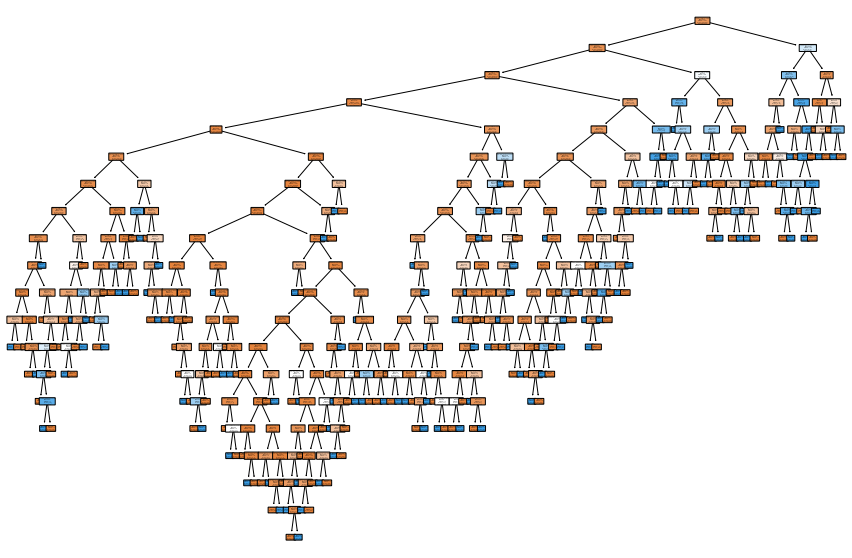

In [38]:
plt.figure(figsize=(15, 10))
plot_tree(clf_dt, filled=True, rounded=True, class_names=["No Churn", "Churn"], feature_names=X.columns); 

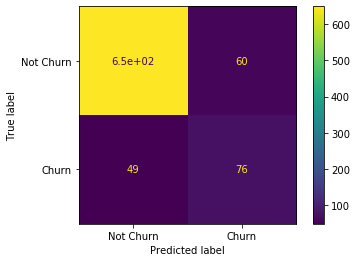

In [37]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["Not Churn", "Churn"])

Pruning

Need to find the right value for the pruning parameter, alpha, which controls how little or how much pruning happens. One way to find the optimal value for alpha is to plot the accuracy of the tree as a function of different values.  We'll do this for both the Training Dataset and the Testing Dataset.

Extract the different values of alpha that are available for this tree and build a pruned tree for each value for alpha.

In [39]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train) 
ccp_alphas = path.ccp_alphas 
ccp_alphas = ccp_alphas[:-1]

# create an array to put decision trees into
clf_dts = [] 


In [40]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]



Testing dataset hits its maximum value at <0.002

#### Cross Validation For Finding the Best Alpha

In [41]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.00075) 


In [42]:

alpha_fold_results = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_fold_results.append([ccp_alpha, np.mean(scores), np.std(scores)])


In [43]:
alpha_results[(alpha_results['alpha'] > 0.0019) &
              (alpha_results['alpha'] < 0.0022)]

NameError: name 'alpha_results' is not defined

In [ ]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.0019) & 
                                (alpha_results['alpha'] < 0.0022)]['alpha']
ideal_ccp_alpha

In [ ]:
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

In [44]:
clf_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train) 

NameError: name 'ideal_ccp_alpha' is not defined

In [45]:
plot_confusion_matrix(clf_dt_pruned, X_test, y_test, display_labels=["No Churn", "Churn"])

NameError: name 'clf_dt_pruned' is not defined

## Oversample Minority Class

In [46]:
df=pd.read_csv('../../data/initial_clean_lc', index_col=[0])
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [47]:
le = LabelEncoder()
df['target'] = le.fit_transform(df['churn'])
# Class 0 is index 0 in this array: False 'no churn'
# Class 1 is index 1 in this array: True 'churn'
print(le.classes_)

df.head()

[False  True]


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn,target
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,0
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,0
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,0


In [48]:
df.target.value_counts()

0    2850
1     483
Name: target, dtype: int64

In [49]:
from sklearn.utils import resample

In [50]:
# Separate majority and minority classes
df_majority = df[df.target==0]
df_minority = df[df.target==1]
 
# Oversample minority class
df_minority_os = resample(df_minority, replace=True, n_samples=2850, random_state=42)

# Combine
df_os = pd.concat([df_majority, df_minority_os])
 
# New class counts
df_os.target.value_counts()

1    2850
0    2850
Name: target, dtype: int64

In [51]:
X = df_os[['account_length','number_vmail_messages','total_day_minutes','total_day_calls','total_day_charge','total_eve_minutes','total_eve_calls', 'total_eve_charge', 'total_night_minutes','total_night_calls','total_night_charge','total_intl_minutes','total_intl_calls','total_intl_charge','total_intl_charge','customer_service_calls']]
y = df_os.target

In [52]:
df_os.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,target
count,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000,5700.000000
mean,101.716316,436.971228,6.822281,190.991386,100.769298,32.469100,205.551316,100.287544,17.471986,203.013298,100.452807,9.135718,10.438088,4.387895,2.818854,1.839649,0.500000
std,39.730095,42.284515,13.043888,62.341186,20.809405,10.598055,51.836584,19.881301,4.405994,48.775644,19.701690,2.195017,2.819454,2.577773,0.761273,1.590541,0.500044
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.000000,408.000000,0.000000,146.000000,87.000000,24.820000,169.275000,87.000000,14.387500,169.675000,86.000000,7.637500,8.700000,3.000000,2.350000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,188.900000,101.500000,32.110000,206.300000,101.000000,17.540000,203.700000,101.000000,9.170000,10.500000,4.000000,2.840000,1.000000,0.500000
75%,127.000000,510.000000,0.000000,237.300000,115.000000,40.340000,241.400000,114.000000,20.520000,237.300000,115.000000,10.680000,12.300000,6.000000,3.320000,3.000000,1.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

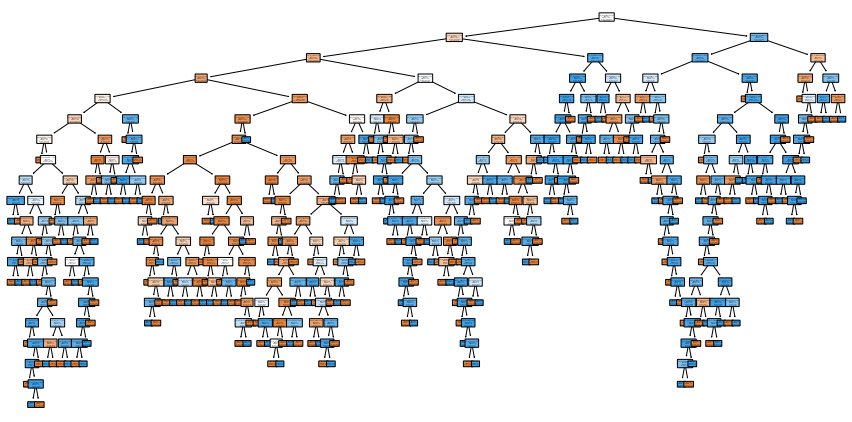

In [54]:
plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt, filled=True, rounded=True, class_names=["No Churn", "Churn"], feature_names=X.columns); 

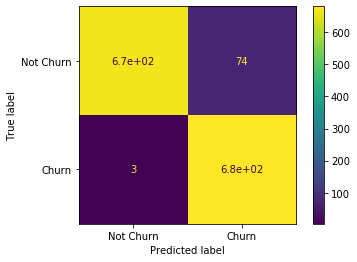

In [55]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["Not Churn", "Churn"])

In [56]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train) 
ccp_alphas = path.ccp_alphas 
ccp_alphas = ccp_alphas[:-1]

clf_dts = [] 


for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

In [57]:
y_hat_train = clf_dt.predict(X_train)
y_hat_test = clf_dt.predict(X_test)

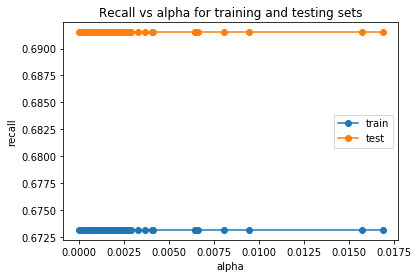

In [58]:
from sklearn.metrics import confusion_matrix, recall_score
train_scores = [recall_score(y_train, y_hat_train) for clf_dt in clf_dts]
test_scores = [recall_score(y_test, y_hat_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [59]:
train_scores

[0.6731301939058172,
 0.6731301939058172,
 0.6731301939058172,
 0.6731301939058172,
 0.6731301939058172,
 0.6731301939058172,
 0.6731301939058172,
 0.6731301939058172,
 0.6731301939058172,
 0.6731301939058172,
 0.6731301939058172,
 0.6731301939058172,
 0.6731301939058172,
 0.6731301939058172,
 0.6731301939058172,
 0.6731301939058172,
 0.6731301939058172,
 0.6731301939058172,
 0.6731301939058172,
 0.6731301939058172,
 0.6731301939058172,
 0.6731301939058172,
 0.6731301939058172,
 0.6731301939058172,
 0.6731301939058172,
 0.6731301939058172,
 0.6731301939058172,
 0.6731301939058172,
 0.6731301939058172,
 0.6731301939058172,
 0.6731301939058172,
 0.6731301939058172,
 0.6731301939058172,
 0.6731301939058172,
 0.6731301939058172,
 0.6731301939058172,
 0.6731301939058172,
 0.6731301939058172,
 0.6731301939058172,
 0.6731301939058172,
 0.6731301939058172,
 0.6731301939058172,
 0.6731301939058172,
 0.6731301939058172,
 0.6731301939058172,
 0.6731301939058172,
 0.6731301939058172,
 0.6731301939

## Undersample Majority Class

In [60]:
# Separate majority and minority classes
df_majority = df[df.target==0]
df_minority = df[df.target==1]
 
# Downsample majority class
df_majority_us = resample(df_majority, replace=False, n_samples=483, random_state=42) 
 
# Combine minority class with downsampled majority class
df_us = pd.concat([df_majority_us, df_minority])
 
# Display new class counts
df_us.target.value_counts()

1    483
0    483
Name: target, dtype: int64

In [61]:
X = df_us[['account_length','number_vmail_messages','total_day_minutes','total_day_calls','total_day_charge','total_eve_minutes','total_eve_calls', 'total_eve_charge', 'total_night_minutes','total_night_calls','total_night_charge','total_intl_minutes','total_intl_calls','total_intl_charge','total_intl_charge','customer_service_calls']]
y = df_us.target

In [62]:
df_us.describe()

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,target
count,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000,966.000000
mean,102.118012,436.416149,7.210145,190.268737,100.654244,32.346242,206.557143,99.783644,17.557495,203.568737,99.795031,9.160621,10.399482,4.252588,2.808385,1.884058,0.500000
std,40.912070,42.078839,13.180624,62.061571,20.471350,10.550484,51.008716,19.856787,4.335647,48.523977,19.576591,2.183674,2.856497,2.411623,0.771116,1.587194,0.500259
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,31.200000,36.000000,2.650000,47.400000,48.000000,2.130000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.000000,408.000000,0.000000,147.100000,87.000000,25.010000,171.625000,86.000000,14.590000,170.100000,85.000000,7.650000,8.500000,2.000000,2.300000,1.000000,0.000000
50%,102.000000,415.000000,0.000000,186.200000,101.000000,31.650000,206.950000,100.000000,17.595000,202.900000,100.000000,9.135000,10.400000,4.000000,2.810000,2.000000,0.500000
75%,127.750000,415.000000,0.000000,234.975000,114.000000,39.945000,241.050000,113.000000,20.487500,238.150000,114.000000,10.717500,12.375000,6.000000,3.342500,3.000000,1.000000
max,225.000000,510.000000,48.000000,350.800000,165.000000,59.640000,363.700000,168.000000,30.910000,364.300000,166.000000,16.390000,20.000000,20.000000,5.400000,9.000000,1.000000


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

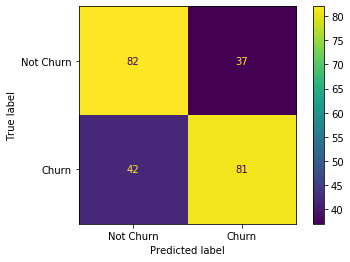

In [64]:
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["Not Churn", "Churn"])